In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
t_train = pd.read_csv("train.csv")

In [3]:
t_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
t_test = pd.read_csv("test.csv")
t_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
t_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

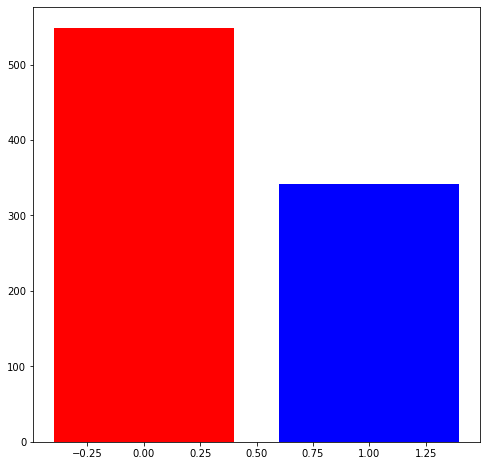

In [6]:
plt.figure(figsize=(8,8))
plt.bar(list(t_train['Survived'].value_counts().keys()),list(t_train['Survived'].value_counts()),color=["r","Blue"])
plt.show()

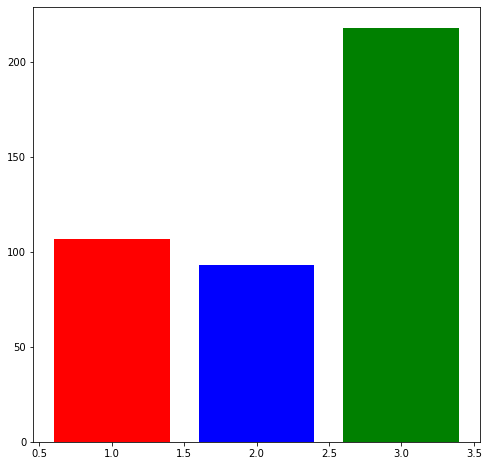

In [7]:
plt.figure(figsize=(8,8))
plt.bar(list(t_test['Pclass'].value_counts().keys()),list(t_test['Pclass'].value_counts()),color=["green","red","Blue"])
plt.show()

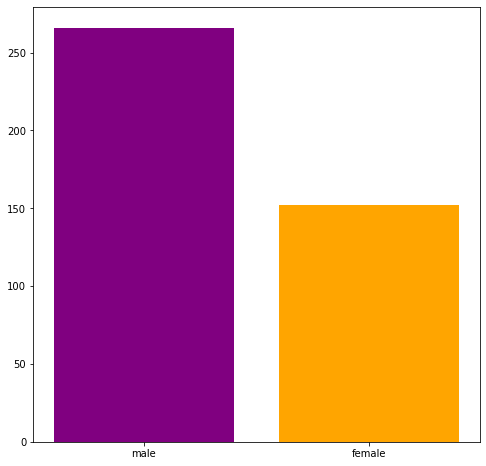

In [8]:
plt.figure(figsize=(8,8))
plt.bar(list(t_test['Sex'].value_counts().keys()),list(t_test['Sex'].value_counts()),color=["purple","orange"])
plt.show()

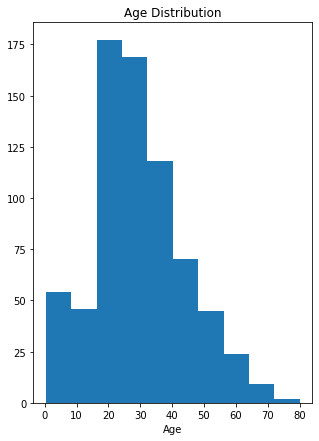

In [9]:
plt.figure(figsize=(5,7))
plt.hist(t_train['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


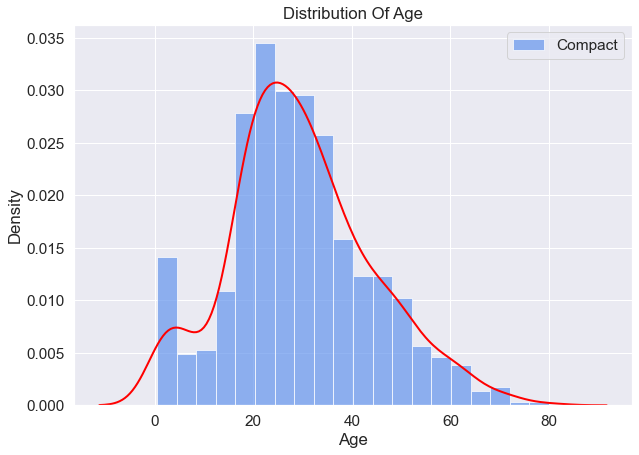

In [10]:
kwargs = dict(hist_kws={'alpha':.7}, kde_kws={'linewidth':2,"color":"red"})
sns.set(font_scale=1.4)
plt.figure(figsize=(10,7))
sns.distplot(t_train['Age'], color="cornflowerblue", label="Compact", **kwargs)
plt.legend();
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.show()

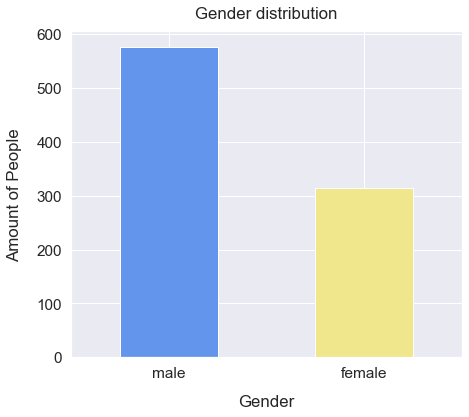

In [11]:
sns.set(font_scale=1.4)
t_train['Sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0,color=["cornflowerblue","khaki"])
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Amount of People", labelpad=14)
plt.title("Gender distribution", y=1.02);

In [12]:
x_train = pd.get_dummies(t_train[["Pclass", "Sex", "SibSp", "Parch"]])
y_train = t_train["Survived"]
x_test = pd.get_dummies(t_test[["Pclass", "Sex", "SibSp", "Parch"]])

#creating our model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=1)
classifier.fit(x_train, y_train)

#predicting the results
y_pred = classifier.predict(x_test)

#converting the result into a pandas dataframe having two attributes "PassengerId" and "Survival predictions"
result = pd.DataFrame({'PassengerId': t_test.PassengerId, 'Survived': y_pred})

#converting our result into a csv file
result.to_csv('survival_predictions.csv', index=False)
print("Successfully Submitted !")

Successfully Submitted !


# Age

In [31]:
data = [t_train, t_test]
for dataset in data:
    mean=t_train["Age"].mean()
    std=t_test["Age"].std()
    isnull=dataset["Age"].isnull().sum()
    random_age = np.random.randint(mean - std,mean + std, size = isnull)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = random_age
    dataset["Age"] = age_slice
    dataset["Age"] = t_train["Age"].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-pac

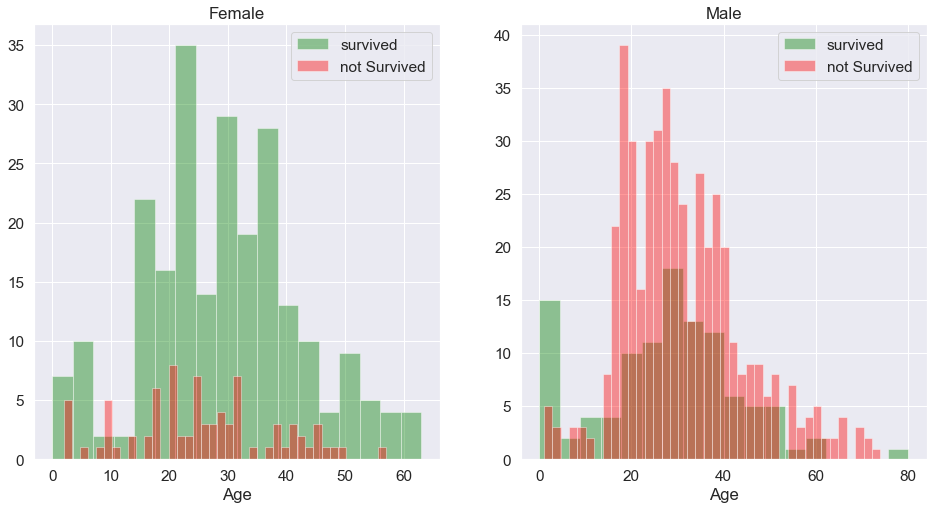

In [54]:
survived = 'survived'
not_survived = 'not Survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (16,8))
women = t_train[t_train["Sex"] == 'female']
men = t_train[t_train["Sex"] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),bins = 18, label = survived, ax = axes[0], kde = False, color="green")
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),bins = 40, label = not_survived, ax = axes[0], kde = False, color="red")

ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [55]:
px.scatter_3d(t_train, x='PassengerId', y = 'Sex', z = 'Age', color = 'Age')
 #3D not shoing in Github File name: 3D.png